In [1]:
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#file_name=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2014.csv',names=['states','district','year','murder','Rape','Custodial Rape', 'Custodial_Gang Rape','Offences promoting enmity between different groups','Promoting enmity between different groups' ,'Imputation', 'assertions prejudicial to national integration' ,'Extortion','Disclosure of Identity of Victims' ,'Incidence of Rash Driving' ,'HumanTrafficking','Unnatural Offence','Other IPC crimes','Total Cognizable IPC crimes'])
fn=pd.read_csv('data/01_District_wise_crimes_committed_IPC_2014.csv')

In [62]:
#fn=fn.loc[fn['District']=='Total']

In [3]:
fn 

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Other places related to work,In Public Transport system,"Places other than 231, 232 & 233",Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Causing Death by Negligence,Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,26,165,0,638,0,0,1038,0
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,94,278,0,538,19,0,249,0
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,11,0,0,91,0,417,0,0,948,0
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,62,464,0,668,32,0,39,0
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,Lakshadweep,Lakshadweep,2014,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,1,0
834,Lakshadweep,Total,2014,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,1,0
835,Puducherry,Karaikal,2014,6,1,0,0,3,0,0,...,0,0,1,1,0,44,0,1,199,0
836,Puducherry,Puducherry,2014,19,14,3,0,7,1,0,...,2,0,4,3,0,165,9,0,974,0


In [4]:
#fn.plot()
fn=fn[['District','Murder']]
fn

,District,Murder
0,Anantapur,134
1,Chittoor,84
2,Cuddapah,80
3,East Godavari,64
4,Guntakal Railway,14
...,...,...
833,Lakshadweep,0
834,Total,0
835,Karaikal,6
836,Puducherry,19


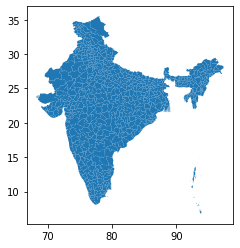

In [7]:
fp = "gadm36_IND_shp/gadm36_IND_2.shp" 
map_df=gpd.read_file(fp)
map_df = map_df[['NAME_2', 'geometry']]
map_df.plot()
merged = map_df.set_index('NAME_2').join(fn.set_index('District'))

In [9]:
merged

,geometry,Murder
Adilabad,"POLYGON ((79.92231 19.15713, 79.90597 19.14179...",101.0
Agar Malwa,"POLYGON ((76.19970 23.70700, 76.19933 23.70590...",NaN
Agra,"POLYGON ((78.20979 26.83609, 78.21165 26.83846...",178.0
Ahmadabad,"POLYGON ((71.89120 22.09747, 71.88139 22.09477...",NaN
Ahmadnagar,"POLYGON ((74.83829 18.33893, 74.83713 18.34180...",NaN
...,...,...
Yadgir,"POLYGON ((76.64614 16.35544, 76.63474 16.35157...",NaN
Yamunanagar,"POLYGON ((77.17542 30.33329, 77.18491 30.33331...",45.0
Yanam,"MULTIPOLYGON (((82.25875 16.69011, 82.25875 16...",NaN
Yavatmal,"POLYGON ((78.95144 20.18411, 78.95232 20.18113...",75.0


In [10]:
merged.isna().sum()

geometry      0
Murder      188
dtype: int64

In [11]:
merged['Murder'].fillna(merged['Murder'].mean(), inplace=True)
merged.isna().sum()

geometry    0
Murder      0
dtype: int64

<AxesSubplot:>

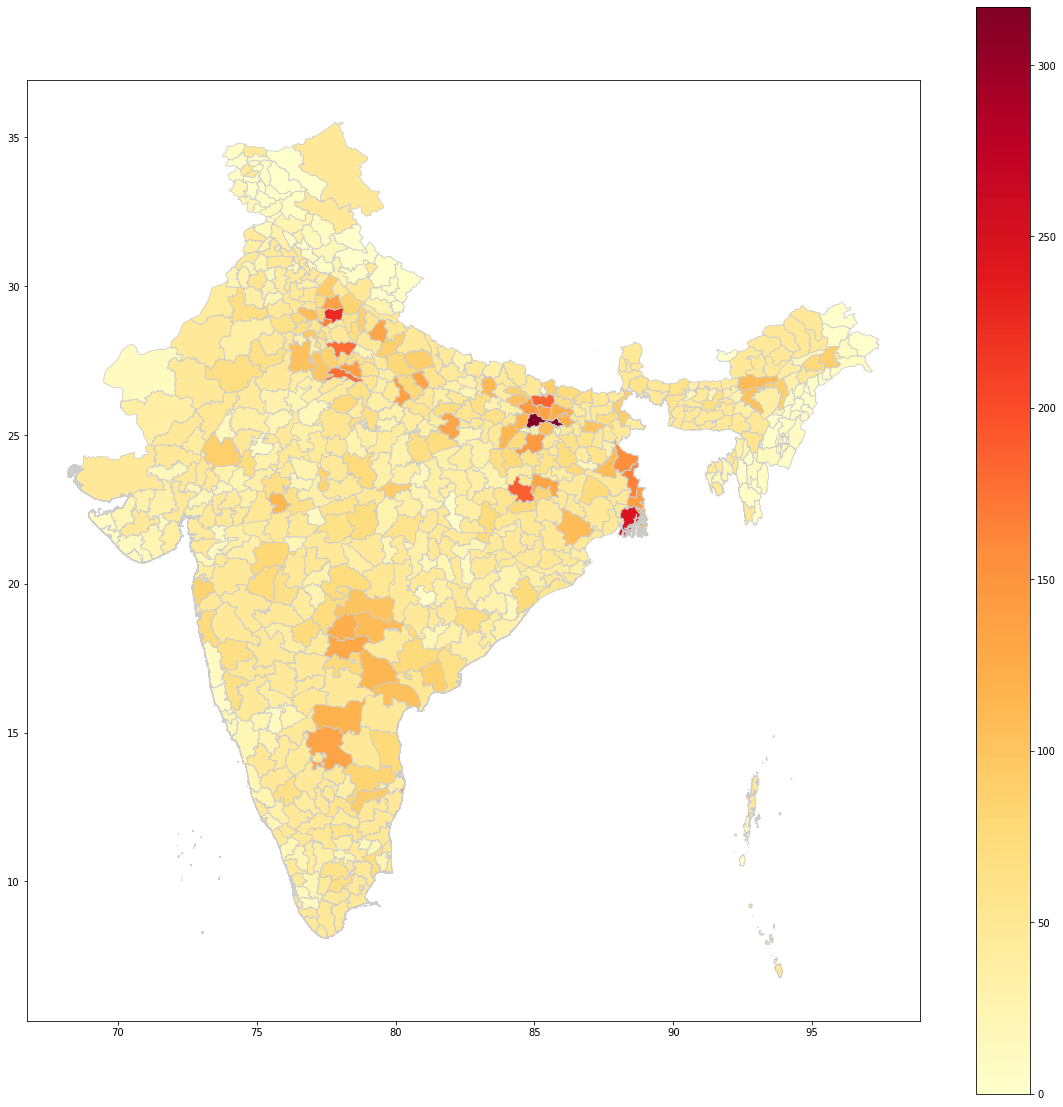

In [12]:
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column='Murder', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)